# **Heart Failure Predictions**

**Introduction**


---



Heart failure affects millions of patients every year and is considered one of the leading causes of death in the world. Prediction and identification of risks of heart failure will save many lives and reduce costs to health expenditures. The current investigation pertains to the dataset of Heart Failure Clinical Records, containing 299 patient records with 13 clinical characteristics. In other words, our aim is to find significant insight in the data, important risk factors, and build a mortality outcome prediction model. This paper tries to provide useful insights for clinicians and healthcare professionals through the use of exploratory analysis and machine learning approaches.

<br>


**Description Of Attribute**


---



age: Patient Age

anaemia: patient Haemoglobin level

creatinine_phosphokinase: Level of the enzyme in the blood

diabetes: If the patient has diabetes

ejection_fraction: Percentage of blood leaving the heart at each contraction

high_blood_pressure: If the patient has hypertensions

platelets: count of blood

serum_creatinine: Level of serum creatinine in the blood

serum_sodium: Level of serum sodium in the blood

sex: Sex of the patient

smoking: If the patient smokes or not

time: Follow-up days

DEATH_EVENT: If the patient deceased during the follow-up days




Data Source link: https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data

**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt2
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import svm
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras import callbacks
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score


**Loading the Dataset**

In [ ]:
df = pd.read_csv('/content/heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


**Counting the Occurance in the Death Events**

[Text(0, 0, '203'), Text(0, 0, '96')]

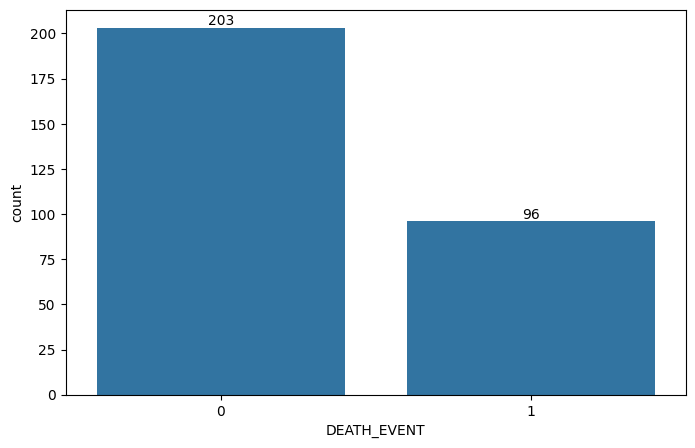

In [ ]:
event_counts=df['DEATH_EVENT'].value_counts()
event_counts=df['DEATH_EVENT'].value_counts()
plt.figure(figsize=(8,5))
ax=sns.countplot(x= df['DEATH_EVENT'])
ax.bar_label(ax.containers[0])


Our target lables are 203 & 96 are imbalanced dataset

**Calculate the mean of specific column grouped by death events**

In [ ]:
df.groupby('DEATH_EVENT')['serum_creatinine'].mean()
df.groupby('DEATH_EVENT').agg({'serum_creatinine': 'mean'})

,serum_creatinine
DEATH_EVENT,
0,1.184877
1,1.835833


**Heatmap Visulaization**

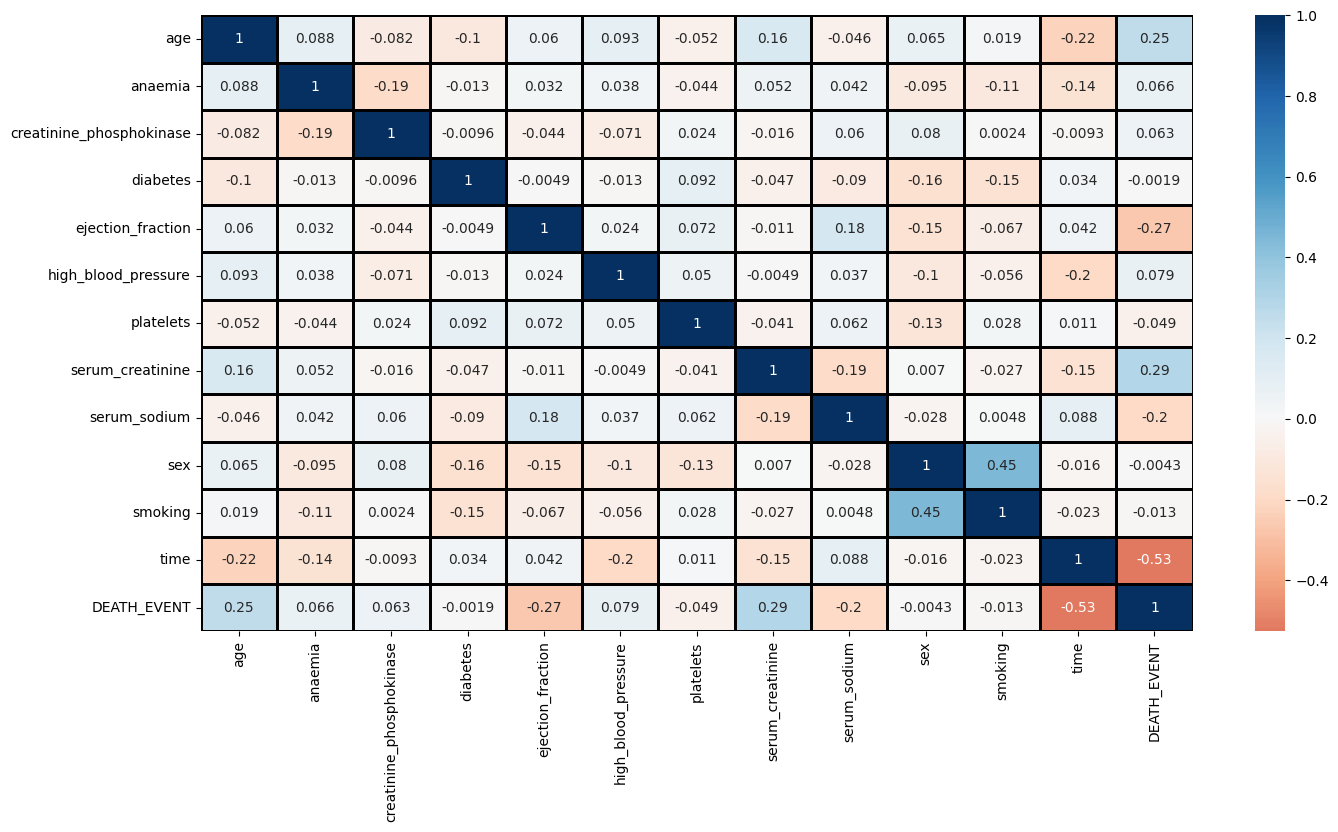

In [ ]:
plt2.figure(figsize=(16,8))
corrmat=df.corr()
sns.heatmap(corrmat, annot=True,cmap='RdBu', center=0, linewidths=1, linecolor='black')
plt2.show()


**Pairwise Relationships (Colored by Death Events)**

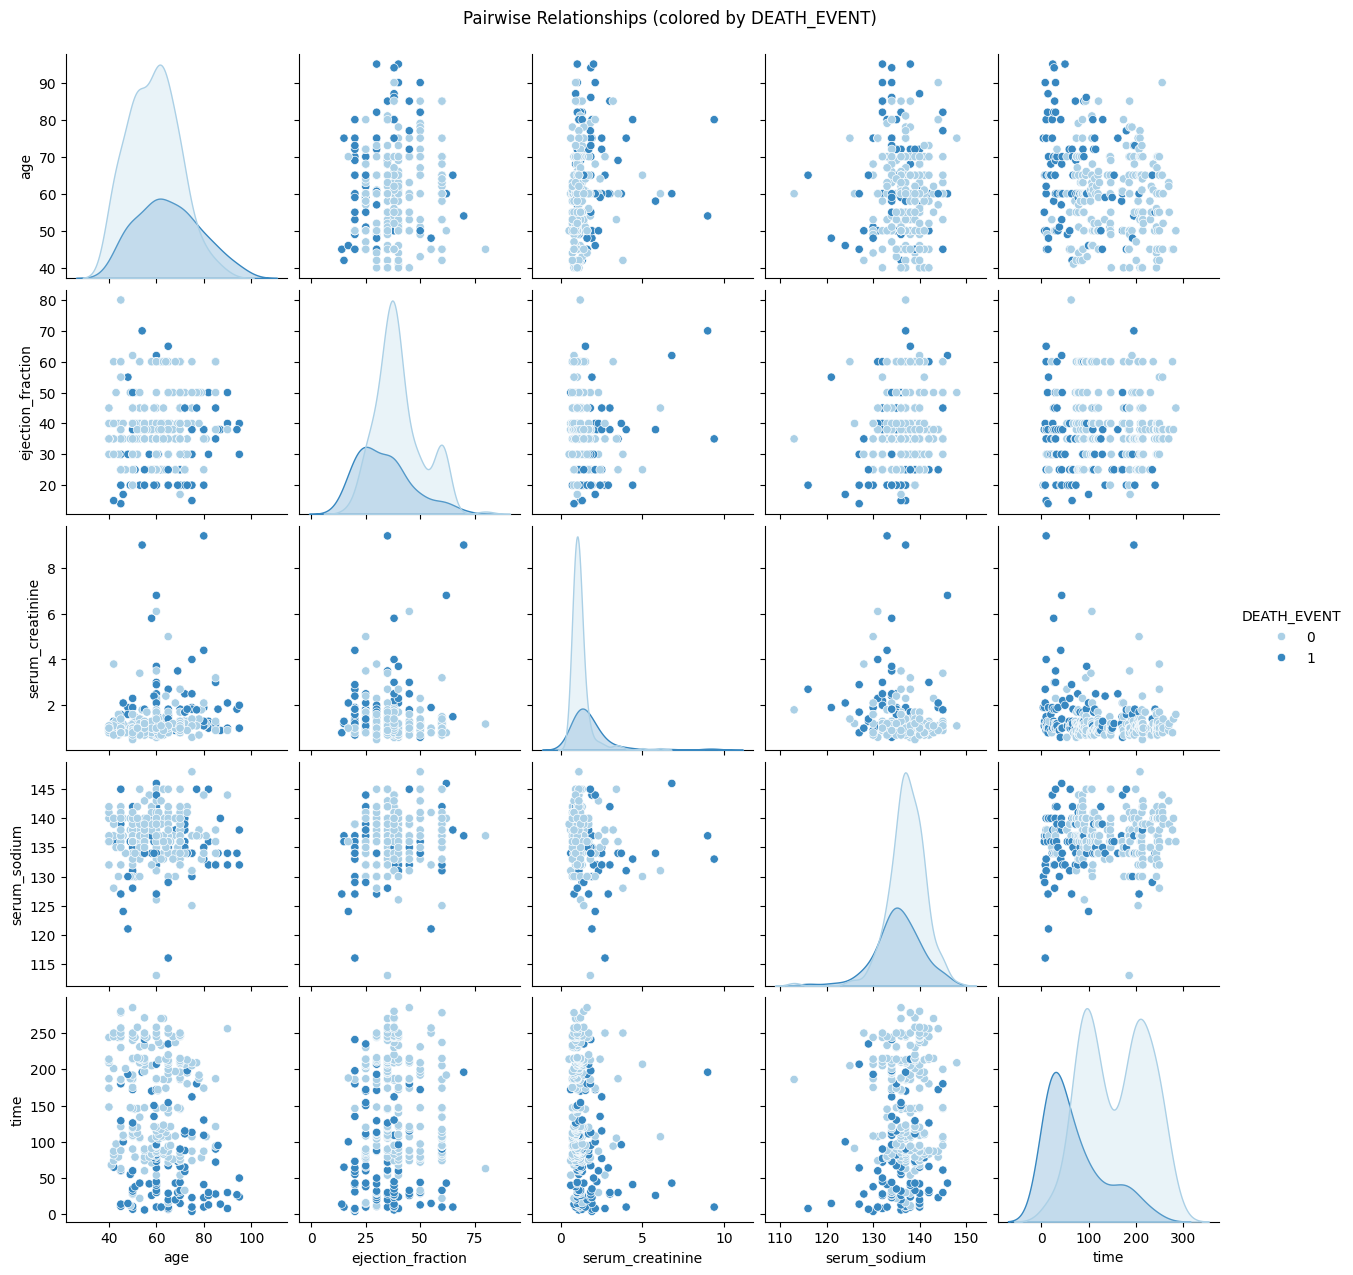

In [ ]:
subset_features = ['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time', 'DEATH_EVENT']

sns.pairplot(df[subset_features], hue='DEATH_EVENT', diag_kind='kde', palette='Blues')
plt2.suptitle('Pairwise Relationships (colored by DEATH_EVENT)', y=1.02)
plt2.show()


**Data Preprocessing**

In [ ]:
X=df.drop(columns='DEATH_EVENT', axis=1)
Y=df['DEATH_EVENT']
cols=list(X.columns)
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled_df=pd.DataFrame(X_scaled, columns=cols)
X_scaled_df.describe().T
X_train, X_test, y_train,y_test = train_test_split(X_scaled,Y,test_size=0.30,random_state=25)

**Model Building**

**SVM (Support Vector Machine)**

In [ ]:
from sklearn.svm import SVC
model1 = SVC()
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
model1.score(X_test, y_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84        60
           1       0.69      0.67      0.68        30

    accuracy                           0.79        90
   macro avg       0.76      0.76      0.76        90
weighted avg       0.79      0.79      0.79        90



**ANN (Artifical Neural Network)**
<br>
 An ANN is configured for a specific application, such as pattern recognition or data classification, through a learning process.

In [ ]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,
    patience=20,
    restore_best_weights=True)

# Initialising the NN
model = Sequential()
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, y_train, batch_size = 25, epochs = 80,callbacks=[early_stopping], validation_split=0.25)

Epoch 1/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.5725 - loss: 0.6929 - val_accuracy: 0.8302 - val_loss: 0.6908
Epoch 2/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6132 - loss: 0.6921 - val_accuracy: 0.8302 - val_loss: 0.6887
Epoch 3/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6056 - loss: 0.6915 - val_accuracy: 0.8302 - val_loss: 0.6864
Epoch 4/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5943 - loss: 0.6911 - val_accuracy: 0.8302 - val_loss: 0.6841
Epoch 5/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6222 - loss: 0.6897 - val_accuracy: 0.8302 - val_loss: 0.6814
Epoch 6/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6499 - loss: 0.6879 - val_accuracy: 0.8302 - val_loss: 0.6786
Epoch 7/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6186 - loss: 0.6876 - val_accuracy: 0.8302 - val_loss: 0.6754
Epoch 8/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6729 - loss: 0.6833 - val_accuracy: 0.8302 - val_loss: 0.6718


In [ ]:
val_accuracy = np.mean(history.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy is', val_accuracy*100))


val_accuracy is: 85.44%


**Plotted Model Accuracy**

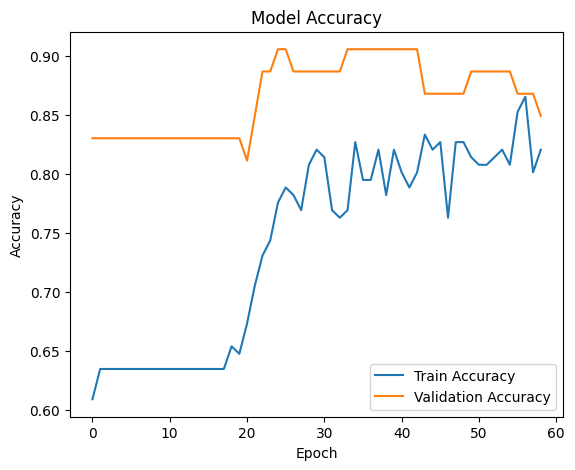

In [ ]:
plt2.figure(figsize=(14, 5))
plt2.subplot(1, 2, 1)
plt2.plot(history.history['accuracy'], label='Train Accuracy')
plt2.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt2.title('Model Accuracy')
plt2.xlabel('Epoch')
plt2.ylabel('Accuracy')
plt.legend()

**Plotted Model Loss**

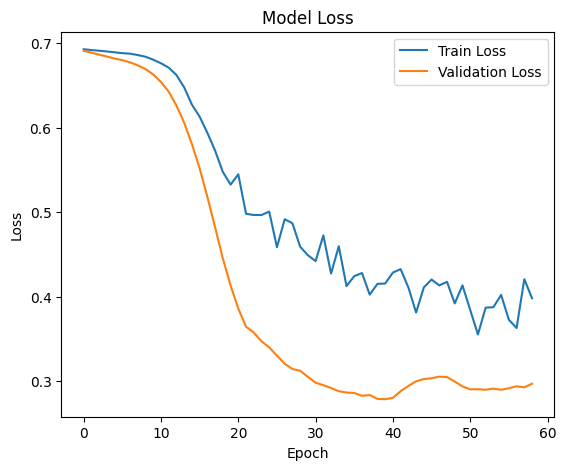

In [ ]:
plt2.figure(figsize=(14, 5))
plt2.subplot(1, 2, 1)
plt2.plot(history.history['loss'], label='Train Loss')
plt2.plot(history.history['val_loss'], label='Validation Loss')
plt2.title('Model Loss')
plt2.xlabel('Epoch')
plt2.ylabel('Loss')
plt2.legend()
plt2.show()


In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.4)
np.set_printoptions()
print(classification_report(y_test, y_pred))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
              precision    recall  f1-score   support

           0       0.89      0.78      0.83        60
           1       0.65      0.80      0.72        30

    accuracy                           0.79        90
   macro avg       0.77      0.79      0.77        90
weighted avg       0.81      0.79      0.79        90



**Different configuration in pipelines**

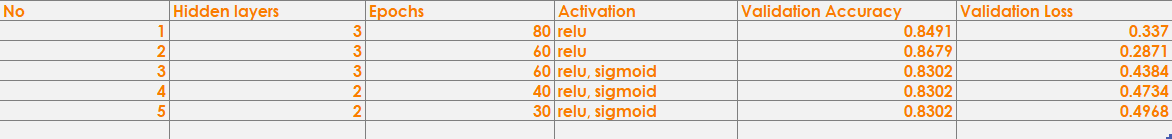

**Conclusion**


---

**ANN** network consist 3 hidden layer. Relu function to activate function for hideen layers & sigmod for output layers. ANN handle complex non linear realtionship. Well high flexibility & can intricate pattern on data.

**SVM** Powerfull classifer & high dimensional spaces. Svm aim optimal hyperplane margin that maximizes the margin between the class. Sometimes Svm may struggle for large dataset & noisy dataset Here we used activation functions like Relu & Sigmoid from 80 to 30 epochs so we got different validation accuracy rates & also validation loss rate.

<br>

**Recommandation**


---

Tuning Hypermeters - In Ann no: of hidden layers unit per layers learning rate, regularization strenth (droupout rate) different activation like tanh, softmax.In Svm consider different experiment with kernals (linear,polynominal) the c regulaization & kernal paramerters. Ensure feature are properly scaled especially for SVM. Because svm is very sensitive scale of data. We can improve model efficiency & avoid overfitting by dimensionality reduction.

**For Further Testing** - Both models on test data to check overfitting or underfitting. Ann indicates overfit adjust dropout rate increase regularization

